In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['Target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df = df.drop(df[['sepal length (cm)','sepal width (cm)']],axis='columns')
df

,petal length (cm),petal width (cm),Target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


Text(0, 0.5, 'petal width (cm)')

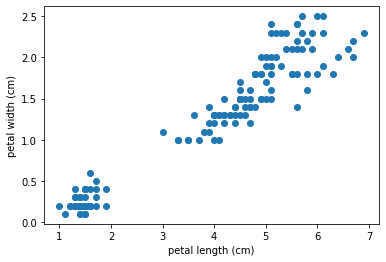

In [ ]:
plt.scatter(df[['petal length (cm)']],df[['petal width (cm)']])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df

,petal length (cm),petal width (cm),Target,cluster
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1
...,...,...,...,...
145,5.2,2.3,2,2
146,5.0,1.9,2,2
147,5.2,2.0,2,2
148,5.4,2.3,2,2


In [ ]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

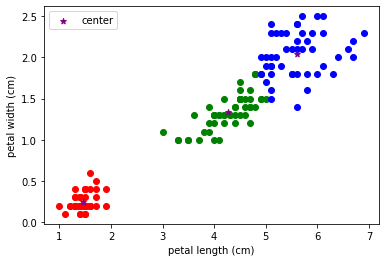

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',color='purple',label='center')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
df

,petal length (cm),petal width (cm),Target,cluster
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1
...,...,...,...,...
145,0.711864,0.916667,2,2
146,0.677966,0.750000,2,2
147,0.711864,0.791667,2,2
148,0.745763,0.916667,2,2


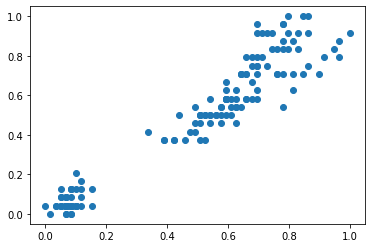

In [ ]:
plt.scatter(df[['petal length (cm)']],df[['petal width (cm)']])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
df['cluster'] = y_predicted

In [ ]:
km.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

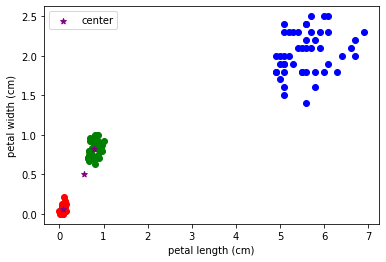

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',color='purple',label='center')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['petal length (cm)','petal width (cm)']])
  sse.append(km.inertia_)

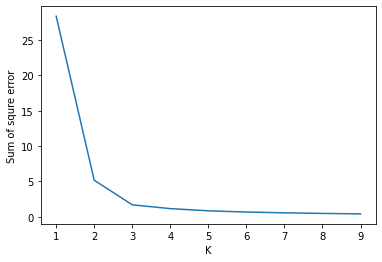

In [ ]:
plt.xlabel("K")
plt.ylabel("Sum of squre error")
plt.plot(k_rng,sse)